In [ ]:
# 1. Load the cars dataset.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
auto =pd.read_csv("autos_small.csv")

In [ ]:
auto

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,1992,8,manuell,89,escort,60000,benzin,ford,kombi
1,3500,Bmw_320_cabrio,1996,0,manuell,150,3er,125000,NaN,bmw,cabrio
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000,A3_Limousine,2006,7,manuell,0,a3,150000,diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio
...,...,...,...,...,...,...,...,...,...,...,...
9995,2650,Opel_Corsa_C_1.2_Twinport,2005,1,manuell,80,corsa,150000,benzin,opel,kleinwagen
9996,9600,Volkswagen_Touran_2.0_TDI_DPF,2011,6,manuell,140,touran,150000,diesel,volkswagen,bus
9997,1500,Suche_zuverlaessigen_Kombi,1999,0,NaN,101,astra,150000,NaN,opel,kombi
9998,970,Renault_Twingo,2002,10,manuell,58,twingo,150000,benzin,renault,kleinwagen


In [ ]:
auto = auto[auto["price"]<auto["price"].quantile(0.99)]

In [ ]:
auto= auto[auto["yearOfRegistration"]<auto["yearOfRegistration"].quantile(0.999)]

In [ ]:
auto["yearOfRegistration"].max()

2017

In [ ]:
auto = auto[auto["yearOfRegistration"]>auto["yearOfRegistration"].quantile(0.001)]

In [ ]:
# 2. Figure out the best strategy to fill missing values

In [ ]:
auto.isna().sum()

price                    0
name                     0
yearOfRegistration       0
monthOfRegistration      0
gearbox                550
powerPS                  0
model                  541
kilometer                0
fuelType               899
brand                    0
vehicleType            928
dtype: int64

Since every missing values are above 5 % , we are filling them

For gear box , there are only 2 categories.So Filling them using previous values

In [ ]:
auto["gearbox"].fillna(method='ffill',inplace=True)

In [ ]:
auto.isna().sum()

price                    0
name                     0
yearOfRegistration       0
monthOfRegistration      0
gearbox                  0
powerPS                  0
model                  541
kilometer                0
fuelType               899
brand                    0
vehicleType            928
dtype: int64

Since the missing values are less and categories are more , we can fill with after values

In [ ]:
auto["model"].fillna(method='bfill',inplace=True)

In [ ]:
auto.isna().sum()

price                    0
name                     0
yearOfRegistration       0
monthOfRegistration      0
gearbox                  0
powerPS                  0
model                    0
kilometer                0
fuelType               899
brand                    0
vehicleType            928
dtype: int64

In [ ]:
auto.groupby(["fuelType"]).count()

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,brand,vehicleType
fuelType,,,,,,,,,,
andere,5,5,5,5,5,5,5,5,5,5
benzin,5853,5853,5853,5853,5853,5853,5853,5853,5853,5500
cng,11,11,11,11,11,11,11,11,11,10
diesel,2853,2853,2853,2853,2853,2853,2853,2853,2853,2727
elektro,2,2,2,2,2,2,2,2,2,2
hybrid,7,7,7,7,7,7,7,7,7,7
lpg,144,144,144,144,144,144,144,144,144,138


In [ ]:
auto.groupby(["vehicleType"]).count()

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand
vehicleType,,,,,,,,,,
andere,99,99,99,99,99,99,99,99,87,99
bus,841,841,841,841,841,841,841,841,810,841
cabrio,613,613,613,613,613,613,613,613,590,613
coupe,514,514,514,514,514,514,514,514,480,514
kleinwagen,2142,2142,2142,2142,2142,2142,2142,2142,2005,2142
kombi,1760,1760,1760,1760,1760,1760,1760,1760,1665,1760
limousine,2507,2507,2507,2507,2507,2507,2507,2507,2397,2507
suv,370,370,370,370,370,370,370,370,355,370


Since Fuel type and vehicle has few variables and most of them belongs to some category , we are replacing them with mode

In [ ]:
auto['fuelType'] = auto['fuelType'].fillna(auto['fuelType'].mode()[0])

In [ ]:
auto['vehicleType'] = auto['vehicleType'].fillna(auto['vehicleType'].mode()[0])

In [ ]:
auto.isna().sum()

price                  0
name                   0
yearOfRegistration     0
monthOfRegistration    0
gearbox                0
powerPS                0
model                  0
kilometer              0
fuelType               0
brand                  0
vehicleType            0
dtype: int64

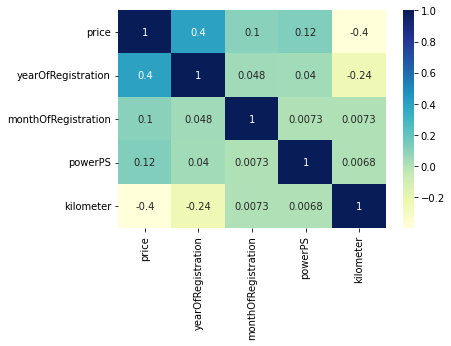

In [ ]:
sns.heatmap(auto.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [ ]:
# 3. Complete any other preprocessing required.

#removing unwanted columns

In [ ]:
auto.columns

Index(['price', 'name', 'yearOfRegistration', 'monthOfRegistration', 'gearbox',
       'powerPS', 'model', 'kilometer', 'fuelType', 'brand', 'vehicleType'],
      dtype='object')

In [ ]:
cols=['name', 'monthOfRegistration','model', 'fuelType', 'brand', 'vehicleType']

In [ ]:
auto.drop(cols,axis=1,inplace=True)

In [ ]:
auto

,price,yearOfRegistration,gearbox,powerPS,kilometer
0,400,1992,manuell,89,60000
1,3500,1996,manuell,150,125000
2,2200,1998,manuell,150,150000
3,4000,2006,manuell,0,150000
4,2600,2002,automatik,41,150000
...,...,...,...,...,...
9995,2650,2005,manuell,80,150000
9996,9600,2011,manuell,140,150000
9997,1500,1999,manuell,101,150000
9998,970,2002,manuell,58,150000


In [ ]:
auto = pd.get_dummies(auto, columns=['gearbox'],drop_first=True)

In [ ]:
auto

,price,yearOfRegistration,powerPS,kilometer,gearbox_manuell
0,400,1992,89,60000,1
1,3500,1996,150,125000,1
2,2200,1998,150,150000,1
3,4000,2006,0,150000,1
4,2600,2002,41,150000,0
...,...,...,...,...,...
9995,2650,2005,80,150000,1
9996,9600,2011,140,150000,1
9997,1500,1999,101,150000,1
9998,970,2002,58,150000,1


In [ ]:
colss =['powerPS','kilometer','gearbox_manuell']

SEPARATION INTO DEPENDANT AND INDEPENDANT VARIABLES

In [ ]:
X =auto['yearOfRegistration'].values
y=auto['price'].values

In [ ]:
X

array([1992, 1996, 1998, ..., 1999, 2002, 2012])

In [ ]:
y

array([ 400, 3500, 2200, ..., 1500,  970, 7990])

SPLITING INTO TRAINING AND TEST DATA

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1000)

FEATURE SCALING 

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler =StandardScaler()
scaler1 =StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1,1))
X_test = scaler.transform(X_test.reshape(-1,1))
y_train = scaler1.fit_transform(y_train.reshape(-1,1))
y_test = scaler1.transform(y_test.reshape(-1,1))



In [ ]:
# 4. Apply various regression models and find out which model is the best for this dataset

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr =LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred =lr.predict(X_test)

In [ ]:
y_pred

array([[-0.01779752],
       [ 0.49329167],
       [-0.24494826],
       ...,
       [-0.0745852 ],
       [ 0.03899017],
       [ 0.15256555]])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
print('Coefficient of determination: %f'% r2_score(y_test, y_pred))

Coefficient of determination: 0.143471


In [ ]:
# 5. Apply different Outlier detection methods and choose best approach to treat outliers 

In [ ]:
auto

,price,yearOfRegistration,powerPS,kilometer,gearbox_manuell
0,400,1992,89,60000,1
1,3500,1996,150,125000,1
2,2200,1998,150,150000,1
3,4000,2006,0,150000,1
4,2600,2002,41,150000,0
...,...,...,...,...,...
9995,2650,2005,80,150000,1
9996,9600,2011,140,150000,1
9997,1500,1999,101,150000,1
9998,970,2002,58,150000,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

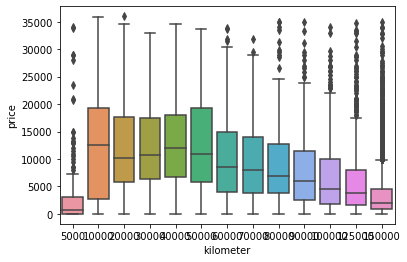

In [ ]:
bx = sns.boxplot(x="kilometer", y="price", data=auto)

In [ ]:
def findoutliers(col):
  outliers=[]
  Q1=col.quantile(0.25)
  Q3=col.quantile(0.75)
  IQR=Q3-Q1
  lower_limit =Q1-(1.5*IQR)
  upper_limit =Q3+(1.5*IQR)
  for out1 in col:
    if out1 > upper_limit or out1 < lower_limit:
      outliers.append(out1)
  return np.array(outliers)



In [ ]:
print(len(findoutliers(auto.price)))

731


In [ ]:
print(len(findoutliers(auto.kilometer)))

1691


The reason for the outliers may be due to the brand name of some cars

In [ ]:
# 6. Apply Variance Inflation Factors calculation and find if the model built has collinearity between different variables

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
auto2 =pd.read_csv("autos_small.csv")

In [ ]:
cols=['name', 'yearOfRegistration', 'monthOfRegistration', 'gearbox', 'model', 'brand', 'vehicleType']

In [ ]:
auto2.drop(cols,axis=1,inplace=True)

In [ ]:
auto2

,price,powerPS,kilometer,fuelType
0,400,89,60000,benzin
1,3500,150,125000,NaN
2,2200,150,150000,benzin
3,4000,0,150000,diesel
4,2600,41,150000,diesel
...,...,...,...,...
9995,2650,80,150000,benzin
9996,9600,140,150000,diesel
9997,1500,101,150000,NaN
9998,970,58,150000,benzin


In [ ]:
auto2['fuelType'] = auto2['fuelType'].fillna(auto2['fuelType'].mode()[0])

In [ ]:
auto2

,price,powerPS,kilometer,fuelType
0,400,89,60000,benzin
1,3500,150,125000,benzin
2,2200,150,150000,benzin
3,4000,0,150000,diesel
4,2600,41,150000,diesel
...,...,...,...,...
9995,2650,80,150000,benzin
9996,9600,140,150000,diesel
9997,1500,101,150000,benzin
9998,970,58,150000,benzin


In [ ]:
auto2 = pd.get_dummies(auto2, columns=['fuelType'],drop_first=True)

In [ ]:
auto2

,price,powerPS,kilometer,fuelType_benzin,fuelType_cng,fuelType_diesel,fuelType_elektro,fuelType_hybrid,fuelType_lpg
0,400,89,60000,1,0,0,0,0,0
1,3500,150,125000,1,0,0,0,0,0
2,2200,150,150000,1,0,0,0,0,0
3,4000,0,150000,0,0,1,0,0,0
4,2600,41,150000,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
9995,2650,80,150000,1,0,0,0,0,0
9996,9600,140,150000,0,0,1,0,0,0
9997,1500,101,150000,1,0,0,0,0,0
9998,970,58,150000,1,0,0,0,0,0


In [ ]:
X = auto2[['price', 'powerPS', 'kilometer']]

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [ ]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

     feature       VIF
0      price  1.002417
1    powerPS  1.113691
2  kilometer  1.115448


VIF factor of around 1 means that there is less or almost no collinearity between the variables